In [6]:
import pandas as pd

invoice_df = pd.read_csv("Desktop/fct_invoice.csv")
customer_df = pd.read_json("Desktop/dim_customer.json")

In [17]:
customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [18]:
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
#1 How many unique customers are in the dataset?
import pandas as pd
invoice_df = pd.read_csv("Desktop/fct_invoice.csv")
customer_df = pd.read_json("Desktop/dim_customer.json")

unique_customer = invoice_df['customer_id'].nunique()

unique_customer

5191

In [37]:
#2 What are the different categories of products available? How many unique categories are there?
invoice_df.category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [43]:
#2 What are the different categories of products available? How many unique categories are there?
unique_categories = invoice_df['category'].nunique()
unique_categories

8

In [15]:
#3 Which payment method is the most popular? How many times was it used?
pay_method = invoice_df['payment_method']
pay_no = invoice_df['payment_method'].value_counts()
pay_no

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [6]:
#4 What are the three most popular categories, by total sales?
import pandas as pd

invoice_df = pd.read_csv("Desktop/fct_invoice.csv")
customer_df = pd.read_json("Desktop/dim_customer.json")

invoice_df['total_sales'] = invoice_df['price']*invoice_df['quantity'] #assuming price x quantity = sale
popular_categories = invoice_df.groupby('category')['total_sales'].sum()
out = popular_categories.nlargest(3)

out

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [32]:
customer_df

,age,first_name,gender,id,last_name,full_name
0,48.0,Nicholas,M,0,Flores,Nicholas Flores
1,NaN,Jeffery,M,1,Rowe,Jeffery Rowe
2,57.0,Alexis,F,2,Benton,Alexis Benton
3,73.0,Amy,F,3,Johnson,Amy Johnson
4,20.0,David,M,4,Moore,David Moore
...,...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris,Arthur Harris
5187,NaN,David,M,9494,Roy,David Roy
5188,85.0,Thomas,M,10350,Turner,Thomas Turner
5189,NaN,April,F,10587,Sanchez,April Sanchez


In [36]:
new_customer_df = customer_df.rename(columns={'id': 'customer_id'})
new_customer_df

,age,first_name,gender,customer_id,last_name,full_name
0,48.0,Nicholas,M,0,Flores,Nicholas Flores
1,NaN,Jeffery,M,1,Rowe,Jeffery Rowe
2,57.0,Alexis,F,2,Benton,Alexis Benton
3,73.0,Amy,F,3,Johnson,Amy Johnson
4,20.0,David,M,4,Moore,David Moore
...,...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris,Arthur Harris
5187,NaN,David,M,9494,Roy,David Roy
5188,85.0,Thomas,M,10350,Turner,Thomas Turner
5189,NaN,April,F,10587,Sanchez,April Sanchez


In [10]:
#5 What are the total sales attributed to customers over the age of 45?
new_customer_df = customer_df.rename(columns={'id': 'customer_id'})
over_45_customers = new_customer_df[(new_customer_df['age']>45) & (new_customer_df['age'].notnull())]
attributed_sales_df = over_45_customers.merge(invoice_df, on='customer_id', how='inner')
total_sales = (attributed_sales_df['price'] * attributed_sales_df['quantity']).sum() #assuming price x quantity = sale
total_sales

82039768.14999999

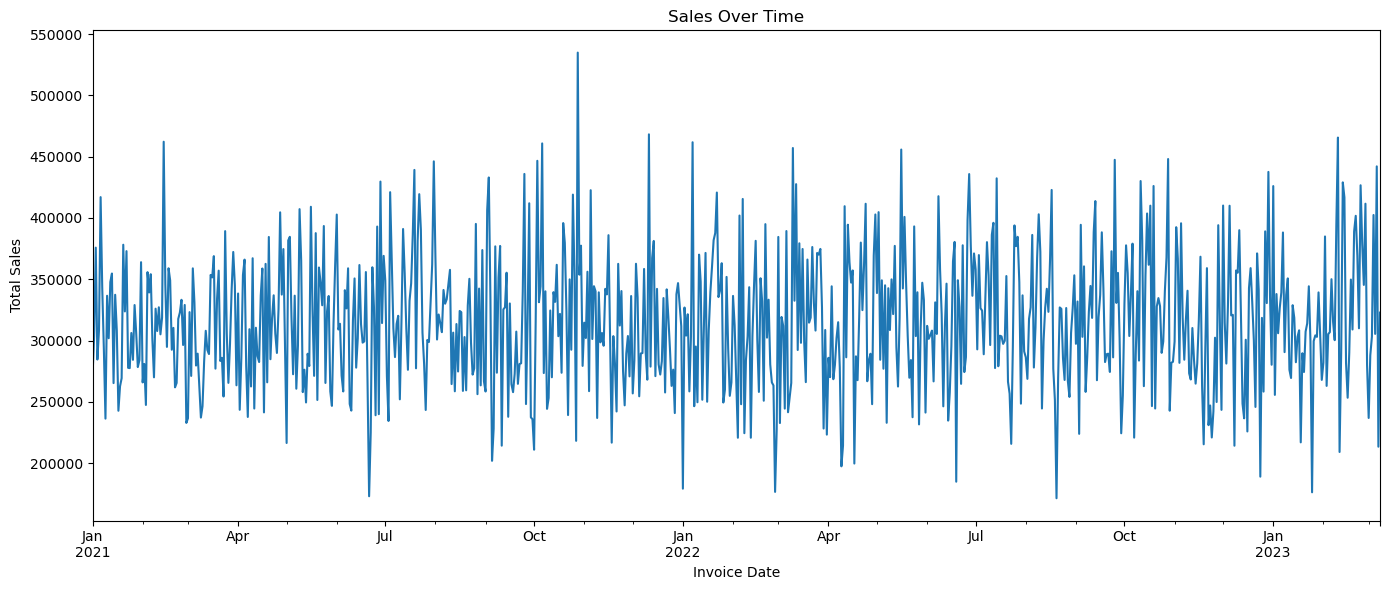

There are no seasonal trends seen in the graph. The sales over time fluctuates in a way that there is no predictable value when looking at the trends over time.


In [7]:
#6 How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
invoice_df = pd.read_csv("Desktop/fct_invoice.csv")
customer_df = pd.read_json("Desktop/dim_customer.json")

invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'], dayfirst=True)
invoice_df['total_sale'] = (invoice_df['price'] * invoice_df['quantity']) #assuming price x quantity = sale
data_dates = invoice_df['invoice_date']

daily_sales = invoice_df.groupby('invoice_date')['total_sale'].sum()

x = invoice_df['invoice_date']
y = daily_sales

plt.figure(figsize=(14, 6))                  
daily_sales.plot()                            
plt.title('Sales Over Time')           
plt.xlabel('Invoice Date')                   
plt.ylabel('Total Sales')                                             
plt.tight_layout()                            
plt.show()   
print("There are no seasonal trends seen in the graph. The sales over time fluctuates in a way that there is no predictable value when looking at the trends over time.")

In [18]:
#7 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
age_customers = new_customer_df[~new_customer_df['age'].isna()]
new_df = age_customers.merge(invoice_df, on='customer_id', how='inner')
new_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sale
0,$48.00,Nicholas,M,0,Flores,I254078,Shoes,3,"$1,800.51",Cash,2021-05-28,Kanyon,"$5,401.53"
1,$48.00,Nicholas,M,0,Flores,I387354,Shoes,1,$600.17,Cash,2021-04-07,Kanyon,$600.17
2,$48.00,Nicholas,M,0,Flores,I170558,Cosmetics,2,$81.32,Cash,2021-02-13,Metropol AVM,$162.64
3,$48.00,Nicholas,M,0,Flores,I187874,Books,4,$60.60,Cash,2023-01-21,Mall of Istanbul,$242.40
4,$48.00,Nicholas,M,0,Flores,I171870,Toys,3,$107.52,Credit Card,2022-08-01,Istinye Park,$322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59347,$84.00,Bryan,M,8888,Davis,I529365,Clothing,1,$300.08,Credit Card,2021-11-04,Metropol AVM,$300.08
59348,$48.00,Chad,M,8889,Hooper,I154835,Toys,3,$107.52,Cash,2021-08-29,Mall of Istanbul,$322.56
59349,$46.00,Lisa,F,9150,Reed,I212035,Cosmetics,4,$162.64,Credit Card,2021-07-14,Metrocity,$650.56
59350,$69.00,Deborah,F,9344,Delgado,I162702,Shoes,2,"$1,200.34",Cash,2021-01-30,Kanyon,"$2,400.68"


In [2]:
#7 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import pandas as pd

invoice_df = pd.read_csv("Desktop/fct_invoice.csv")
customer_df = pd.read_json("Desktop/dim_customer.json")

new_customer_df = customer_df.rename(columns={'id': 'customer_id'})
age_customers = new_customer_df[~new_customer_df['age'].isna()]
new_df = age_customers.merge(invoice_df, on='customer_id', how='inner')
new_df

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]  
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
new_df['age_range'] = pd.cut(new_df['age'], bins=bins, labels=labels)

pd.set_option("display.float_format", "{:,.2f}".format)
new_df['total'] = new_df['price']* new_df['quantity']
pivot_table = new_df.pivot_table(values="total", index="category", columns="age_range", aggfunc="sum", observed=False)
pivot_table

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,"19,891.95","80,128.35","84,446.10","82,946.25","79,537.50","76,234.80","56,251.95","21,103.95"
Clothing,"3,029,007.52","10,079,987.28","11,516,170.16","10,933,114.72","10,819,684.48","10,004,067.04","7,871,098.40","3,739,897.04"
Cosmetics,"178,009.48","594,733.82","722,406.22","656,740.32","621,366.12","599,735.00","427,824.52","214,684.80"
Food & Beverage,"20,433.61","74,271.23","89,187.19","85,034.57","77,686.42","76,127.88","55,584.44","25,334.12"
Shoes,"1,367,187.26","6,152,942.84","7,178,633.37","6,775,319.13","6,268,175.48","5,499,357.71","4,718,536.54","2,125,201.97"
Souvenir,"20,128.68","53,570.91","63,705.63","65,007.66","57,594.30","51,482.97","38,439.21","20,234.25"
Technology,"1,772,400.00","5,049,450.00","6,231,750.00","5,840,100.00","4,662,000.00","5,218,500.00","3,773,700.00","1,449,000.00"
Toys,"98,273.28","380,011.52","426,460.16","378,864.64","357,002.24","340,659.20","285,608.96","126,336.00"
